In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

# Load and Verify Data

In [2]:
# On Mac
#product_path = 'C:\\Users\\bxiao\\Documents\\project_files\\hm_viz\\hm_products.xlsx'
# On Linux
product_path = '/home/specc/Documents/project_files/hm_viz_project/hm_products.xlsx'
product_sheet = 'hm_products'

# on Mac
#higg_file = 'C:\\Users\\bxiao\\Documents\\project_files\\hm_viz\\higg_msi_data.xlsx'
# on Linux
higg_file = '/home/specc/Documents/project_files/hm_viz_project/higg_msi_data.xlsx' 
#higg_sheet = 'higg_msi_data'

In [3]:
product_df = pd.read_excel(product_path, sheets=product_sheet)
product_df.head()

,code,name,materials,factory_name,country,supplier_name
0,107727001,Washed Linen Bathrobe,"{""Linen"": 100}",Shanghai Donglong Home Textile Products Co.Ltd...,China,"SHANGHAI DONGLONG HOME TEXTILE PRODUCTS CO., ..."
1,107727001,Washed Linen Bathrobe,"{""Linen"": 100}","Yan Tai North Hometextile Co.,ltd",China,"YAN TAI NORTH HOME TEXTILE CO.,LTD"
2,107727002,Washed Linen Bathrobe,"{""Linen"": 100}",Shanghai Donglong Home Textile Products Co.Ltd...,China,"SHANGHAI DONGLONG HOME TEXTILE PRODUCTS CO., ..."
3,107727002,Washed Linen Bathrobe,"{""Linen"": 100}","Yan Tai North Hometextile Co.,ltd",China,"YAN TAI NORTH HOME TEXTILE CO.,LTD"
4,107727021,Washed Linen Bathrobe,"{""Linen"": 100}",Shanghai Donglong Home Textile Products Co.Ltd...,China,"SHANGHAI DONGLONG HOME TEXTILE PRODUCTS CO., ..."


In [4]:
#higg_df = pd.read_excel(product_path, sheets=higg_sheet)
higg_df = pd.read_excel(higg_file)
higg_df.head()

,material,score,category
0,BiComponent Coating,28,Coatings and Laminations
1,BiComponent Laminate,31,Coatings and Laminations
2,Microporous Coating,23,Coatings and Laminations
3,Microporous Laminate,26,Coatings and Laminations
4,Monolithic Coating,23,Coatings and Laminations


# Begin Extracting Materials

In [5]:
product_df.materials.iloc[0].split(':')

['{"Linen"', ' 100}']

In [6]:
test_item = json.loads(product_df.materials.iloc[0])
print(test_item)

{'Linen': 100}


In [10]:
for i in test_item.keys():
    print(i)

Linen


## Count how many times each material appears in the data

In [25]:
mat_counts_dict = dict()
over_calc_dict = dict()

materials_col = product_df.materials

In [26]:
# create function to get material and count the materials

def count_mats(materials_list, storage_dict):
    for item in materials_list: # Loop through material list to get item in column
        mats = json.loads(item) # Turn string into Python dictionary
        for mat in mats.keys(): # Loop through the materials for unique ones
            if mat in mat_counts_dict.keys(): # Calculate values
                storage_dict[mat] += 1 
            else:
                storage_dict[mat] = 1

In [28]:
count_mats(materials_col, mat_counts_dict)

In [29]:
mat_counts_dict

{'Linen': 75,
 'Elastane': 1482,
 'Polyester': 1932,
 'Cotton': 3696,
 'Polyamide': 303,
 'Elastodiene': 36,
 'Viscose': 409,
 'Wool': 187,
 'Imitation fur': 2,
 'Imitation suede': 15,
 'Leather': 87,
 'Plastic': 32,
 'Copper': 9,
 'Stainless steel': 5,
 'Cashmere': 57,
 'Silk': 46,
 'Straw': 2,
 'Zinc': 13,
 'Paper straw': 4,
 'Thermoplastic rubber': 121,
 'Rubber': 101,
 'Imitation leather': 29,
 'Suede': 34,
 'Glass': 7,
 'Metal': 28,
 'Wood': 11,
 'Acrylic': 243,
 'Modacrylic': 16,
 'Elasterell-P': 21,
 'Polypropylene': 5,
 'Ethylene Vinyl Acetate': 41,
 'Other fibers': 5,
 'Lyocell': 10,
 'Polyurethane': 54,
 'Polyethylene': 9,
 'Reconstitute stone': 3,
 'Cupro': 1,
 'Copolyester': 2,
 'Modal': 21,
 'Jute': 2,
 'Steel': 18,
 'Regenerated leather': 2,
 'Semi precious stone': 2,
 'Acetate': 2,
 'Thermoplastic Polyurethane': 1,
 'Polymethyl methacrylate': 2,
 'Polycarbonate': 4,
 'Down': 6,
 'Feather': 6,
 'Natural rubber': 1,
 'Metallized fiber': 3}

In [36]:
# Put into pandas df
mats_df = pd.DataFrame(mat_counts_dict.values(), index=mat_counts_dict.keys())
mats_df.head()

,0
Linen,75
Elastane,1482
Polyester,1932
Cotton,3696
Polyamide,303


In [37]:
len(product_df)

4922

In [54]:
# Rename column to count
mats_df.rename(columns={0:'count'}, inplace=True)

In [62]:
mats_df.sort_values(by='count', ascending=False)

,count
Cotton,3696
Polyester,1932
Elastane,1482
Viscose,409
Polyamide,303
Acrylic,243
Wool,187
Thermoplastic rubber,121
Rubber,101
Leather,87


In [66]:
mats_df

,count
Linen,75
Elastane,1482
Polyester,1932
Cotton,3696
Polyamide,303
Elastodiene,36
Viscose,409
Wool,187
Imitation fur,2
Imitation suede,15


In [71]:
filtered_mats = mats_df[mats_df >= 50]

In [80]:
filtered_mats.dropna(inplace=True)

In [85]:
list(filtered_mats.index)

['Linen',
 'Elastane',
 'Polyester',
 'Cotton',
 'Polyamide',
 'Viscose',
 'Wool',
 'Leather',
 'Cashmere',
 'Thermoplastic rubber',
 'Rubber',
 'Acrylic',
 'Polyurethane']

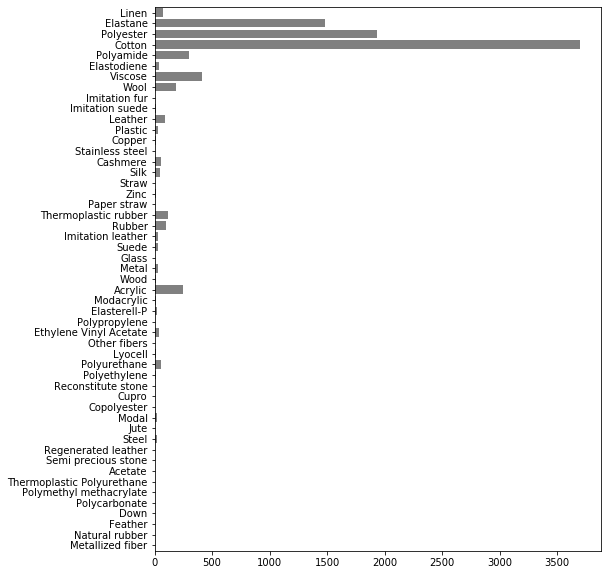

In [116]:
# Bar of all materials

y_values = list(mats_df.index)
x_values = list(mats_df.values.T[0])

plt.figure(figsize=(8,10))
sns.barplot(x=x_values, y=y_values, color='gray')

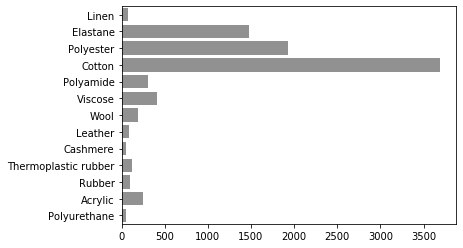

In [113]:
# Bar of materials over 50 count
sns.set_palette('pastel')

y_values = list(filtered_mats.index)
x_values = list(filtered_mats.values.T[0])
#sns.barplot(x=filtered_mats, y=filtered_mats.index)
sns.barplot(x=x_values, y=y_values, color='#919191')